<h1>Análise de indicadores macroeconônmicos: Selic e IPCA</h1> 
Autor: <a href=https://www.linkedin.com/in/mailson-p-92909928a/> Mailson Vieira Passos <a/>

<hr>

<h2>Conteúdo</h2>
<div class="alert alert-block alert-danger" style="background-color: #ffffee; margin-top: 20px; margin-left: 10px; color: black; font-size: 15px">
    <ol>
        <li><a href="#Motivacao">Motivação</a></li>
        <li><a href="#Objetivo">Objetivo</a></li>
        <li><a href="#Requisitos">Requisitos</a></li>
        <li><a href="#ColetaTransf">Coletando e transformando os dados + pré-análise</a></li>
            <ol>
                <a href="#Selic">Selic</a></li>
                <ol>
                    <a href="#SobreSelic">Sobre o dataset: Selic</a></li>
                </ol>
                <a href="#IPCA">IPCA</a></li>
                <ol>
                    <a href="#SobreIPCA">Sobre o dataset: IPCA</a></li>
                </ol>
            </ol>    
    </ol>

</div>

<h2><span id='Motivacao'>Motivação</span></h2>
Muito se fala na mídia sobre inflação e juros e o uso que o Banco Central faz dos juros para controle da inflação. Tenho interesse em entender quão efetivo é o aumento ou diminuição dos juros para controle da inflação, neste caso o IPCA. Para isso vou utilizar a Selic e o IPCA.
</ul>

O que é a Selic?

>A taxa Selic é a taxa básica de juros da economia, que influencia outras taxas de juros do país, como taxas de empréstimos, financiamentos e aplicações financeiras. A definição da taxa Selic é o principal instrumento de política monetária utilizado pelo Banco Central (BC) para controlar a inflação.  
A Selic é a taxa de juros média praticada nas operações compromissadas com títulos públicos federais com prazo de um dia útil. O BC realiza operações no mercado de títulos públicos para que a taxa Selic efetiva esteja em linha com a meta da taxa Selic, que é definida pelo Comitê de Política Monetária (Copom) do BC.  
\
Fonte: <a href = 'https://www.bcb.gov.br/controleinflacao/taxaselic'> <b>Banco Central do Brasil</b> </a>

E o que é o IPCA?


>O Índice Nacional de Preços ao Consumidor Amplo (IPCA) mede a inflação de um conjunto de bens e serviços comercializados no varejo, referentes ao consumo pessoal das famílias, cujo rendimento varia entre 1 e 40 salários mínimos, visando uma cobertura de 90 % das famílias pertencentes as áreas urbanas de abrangência do Sistema Nacional de Índices de Preços ao Consumidor (SNIPC), qualquer que seja a fonte de rendimentos. É calculado a partir dos resultados dos índices regionais, utilizando-se a média aritmética ponderada e cuja a variável de ponderação é o Rendimento Familiar Monetário Disponível, tendo como fonte de informação a Pesquisa de Orçamentos Familiares - POF. Refere-se ao número índice (número de pontos ) das taxas de variações de preços do grupo de bens e serviços.  
\
Fonte: <a href = 'http://www.ipeadata.gov.br/ExibeSerie.aspx?serid=36482&module=M'> <b>IPEA</b> </a>

Em suma, a taxa Selic é taxa básica de juros e ela é a principal ferramenta utilizada para controle de inflação. Já o IPCA é um índice de preços que é usado para monitorar a inflação e é referência para o sistema de metas do Banco Central do Brasil.

<hr>

<h2><span id='Objetivo'>Objetivo</span></h2>
<ul>
    <li>Coletar dados da Selic no site do <a href=https://www.bcb.gov.br/controleinflacao/historicotaxasjuros>Banco Central do Brasil</a> e IPCA do arquivo disponível em <a href=https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html?=&t=downloads>IBGE</a></li>
    <li>Fazer transformações necessárias</li>
    <li>Pré-analisar</li>
</ul>

<hr>
<h2>Requisitos</h2>
O que eu estou usando:

```python
!pip install pandas==2.0.0
!pip install numpy==1.26.1
!pip install matplotlib==3.8.0
!pip install seaborn==0.13.2
!pip install bs4==4.12.2  
!pip install requests==2.31.0
```
<hr>

<h2><span id='ColetaTransf'></span>Extração, transformação e pré-análise</h2>

<h3><span id='Selic'></span>1. Selic</h3>
Os dados do arquivo selic.csv foram coletado por meio de um script de webscrapping. O script usa a biblioteca Selenium, que automatiza o browser para realizar alguma ação. Normalmente o selinium é utilizado para fazer testes, mas aqui estou utilizando para obter dados de uma tabela que é dinâmica.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
selic_data_file = r'dados/selic.tsv'

In [3]:
selic_df = pd.read_csv(
    selic_data_file,
    header = None,
    sep = '\t'
)
selic_cols =[
    'reuniao_num',
    'reuniao_data',
    'reuniao_vies',
    'periodo_vigencia',
    'meta_selic_pctaa',
    'tban_pctam',
    'taxa_selic_pct',
    'taxa_selic_pctaa'
]
selic_df.columns = selic_cols
selic_df.head()

,reuniao_num,reuniao_data,reuniao_vies,periodo_vigencia,meta_selic_pctaa,tban_pctam,taxa_selic_pct,taxa_selic_pctaa
0,269ª,19/03/2025,NaN,20/03/2025 -,"14,25",NaN,NaN,NaN
1,268ª,29/01/2025,NaN,30/01/2025 - 19/03/2025,"13,25",NaN,"1,63","13,15"
2,267ª,11/12/2024,NaN,12/12/2024 - 29/01/2025,"12,25",NaN,"1,51","12,15"
3,266ª,06/11/2024,NaN,07/11/2024 - 11/12/2024,"11,25",NaN,"0,97","11,15"
4,265ª,18/09/2024,NaN,19/09/2024 - 06/11/2024,"10,75",NaN,"1,42","10,65"


<h4><span id='SobreSelic'></span>Sobre o dataset: Selic</h4>

<table>
    <thead>
        <tr>
            <th>Variável</th>
            <th>Descrição</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>reuniao_num</th>
            <td>Classificação ordinal da reunião do Copom</td>
        </tr>
        <tr>
            <th>reuniao_data</th>
            <td>Data da reunião</td>
        </tr>
        <tr>
            <th>reuniao_vies</th>
            <td>Indicativo de tendência de mudança da taxa Selic. Essa mudança pode ser feita na meta, na direção do viés, para a taxa Selic a qualquer momento entre as reuniões ordinárias. </td>
        </tr>
        <tr>
            <th>periodo_vigencia</th>
            <td>Período em que a meta selic fica vigente. </td>
        </tr>
        <tr>
            <th>meta_selic_pctaa</th>
            <td>Meta de juros como referência . </td>
        </tr>
        <tr>
            <th>tban_pctam</th>
            <td> Taxa de Assistência do Banco Central: é uma taxa cobrada em empréstimos quando bancos não possuem títulos públicos para oferecer como garantia, ou quando superam os limites de crédito da linha que utiliza a Taxa Básica do banco central. A TBAN foi criada em 28/8/96 e extinta em 4/3/99 </td>
        </tr>
        <tr>
            <th>taxa_selic_pct</th>
            <td>Taxa média ponderada e ajustada dos financiamentos diários apurados no Sistema Especial de Liquidação e de Custódia (Selic) para operações compromissadas de um dia (overnight) lastreadas em títulos públicos federais, acumulada no período. Títulos públicos são títulos emitidos pelo governo federal e são utilizados por ele para se financiar. </td>
        </tr>
        <tr>
            <th>taxa_selic_pctaa</th>
            <td>Taxa selic anualizada com base em 252 dias úteis. </td>
        </tr>
    </tbody>
</table>

Percebemos que temos dois tipos de Selic: a Selic meta e a Selic efetiva (também chamada de over). Enquanto a primeira é calculada e divulgada pelo Comitê de Política Monetária (COPOM), a última é resultado das operações diárias na SELIC, que é um sistema gerido pelo BCB e acessado por instituições financeiras. É importante ressaltar que há uma lei que obriga instituições financeiras a manter uma quantidade mínima de dinheiro em caixa. Caso esse mínimo não seja cumprido, operações de empréstimo entre instituições financeiras são realizadas a fim de que haja o montante mínimo. A taxa usada para calcular os juros das operações é a Selic meta. Esses empréstimos têm duração de 24 horas e por vezes são chamadas de overnight.

Ref:  
<a href= "https://www.youtube.com/watch?v=WBNkhIaY7gc">canal no youtube da Nexo Jornal</a>  
<a href= "https://warren.com.br/magazine/taxa-selic/">página da Warren Magazine</a>  
<a href= "https://www.bcb.gov.br/en/monetarypolicy/selicrate">site do BCB</a>

A coluna periodo_vigencia abrange a data inicial e a data final de vigência. Para melhorar o acesso a essa coluna, vamos criar duas colunas: uma com a data inicial e outra com a data final, mas antes de tudo será necessário corrigir a formatação dessa coluna adicionando um espaço depois do hífen para que a divisão seja feita na string ' - '.

In [4]:
selic_df.at[0, 'periodo_vigencia'] = selic_df.at[0,'periodo_vigencia'] + ' '
selic_df[['vigencia_inicio', 'vigencia_fim']] = selic_df['periodo_vigencia'].str.split(' - ', expand =  True)
selic_df.head()

,reuniao_num,reuniao_data,reuniao_vies,periodo_vigencia,meta_selic_pctaa,tban_pctam,taxa_selic_pct,taxa_selic_pctaa,vigencia_inicio,vigencia_fim
0,269ª,19/03/2025,NaN,20/03/2025 -,"14,25",NaN,NaN,NaN,20/03/2025,
1,268ª,29/01/2025,NaN,30/01/2025 - 19/03/2025,"13,25",NaN,"1,63","13,15",30/01/2025,19/03/2025
2,267ª,11/12/2024,NaN,12/12/2024 - 29/01/2025,"12,25",NaN,"1,51","12,15",12/12/2024,29/01/2025
3,266ª,06/11/2024,NaN,07/11/2024 - 11/12/2024,"11,25",NaN,"0,97","11,15",07/11/2024,11/12/2024
4,265ª,18/09/2024,NaN,19/09/2024 - 06/11/2024,"10,75",NaN,"1,42","10,65",19/09/2024,06/11/2024


Como a coluna periodo_vigencia não será mais necessária, podemos excluí-la.

In [5]:
selic_df = selic_df.drop(['periodo_vigencia'], axis = 1)
selic_cols = selic_df.columns

Temos alguns dados faltantes, mas quantos?

In [6]:
selic_df.isnull().sum().sum()

340

Vamos verificar o tipo dos dados.

In [7]:
selic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   reuniao_num       277 non-null    object
 1   reuniao_data      277 non-null    object
 2   reuniao_vies      187 non-null    object
 3   meta_selic_pctaa  277 non-null    object
 4   tban_pctam        29 non-null     object
 5   taxa_selic_pct    276 non-null    object
 6   taxa_selic_pctaa  276 non-null    object
 7   vigencia_inicio   277 non-null    object
 8   vigencia_fim      277 non-null    object
dtypes: object(9)
memory usage: 19.6+ KB


Todas estão com formato object. Devido ao método de extração é possível que todas as colunas possuam strings em sua composição.

In [8]:
def dfcols_type(df: pd.DataFrame, filter: bool | None = None) -> dict[str, set]:
    '''Mostra os tipos presentes em cada coluna de um dataframe
    
    Parametros:
    -----
    df: pd.DataFrame
        Dataframe a ser analisado.
    filter: bool, optional
        Caso True, mostra as colunas com mais de um tipo.
        
    Retorna:
    -----
    df_coltype: dict
        Dicionário contendo o nome da coluna e os tipos presentes nessa coluna.
    '''
    df_coltypes = {}
    df_cols = df.columns 

    for col in df_cols:
        coltypes= set(df[col].apply(lambda x: type(x)))

        if filter and len(coltypes) < 2:
            continue
        df_coltypes[col] = coltypes

    return df_coltypes

In [9]:
dfcols_type(selic_df)

{'reuniao_num': {str},
 'reuniao_data': {str},
 'reuniao_vies': {float, str},
 'meta_selic_pctaa': {str},
 'tban_pctam': {float, str},
 'taxa_selic_pct': {float, str},
 'taxa_selic_pctaa': {float, str},
 'vigencia_inicio': {str},
 'vigencia_fim': {str}}

Todas possuem string e algumas contém float devido aos NaNs. Se eu usasse a tabela que eu extraí diretamente do script, todas estariam como string, mas como usei a versão salva no csv, ele identificou automaticamente os valores nulos.

Transformemos, então, os dados de cada coluna para seus respectivos formatos. Para isso, vou fazer da seguinte forma: 

<table>
    <thead>
        <tr>
            <th>Variável</th>
            <th>Tipo</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>reuniao_num</th>
            <td>Manter como string.</td>
        </tr>
        <tr>
            <th>reuniao_data</th>
            <td>Transformar para data.</td>
        </tr>
        <tr>
            <th>reuniao_vies</th>
            <td>Manter como string. </td>
        </tr>
        <tr>
            <th>meta_selic_pctaa</th>
            <td>Transformar para float. </td>
        </tr>
        <tr>
        <th>tban_pctam</th>
            <td>Transformar para float. </td>
        </tr>
        <tr>
            <th>taxa_selic_porcento</th>
            <td>Transformar para float. </td>
        </tr>
        <tr>
            <th>taxa_selic_pctaa</th>
            <td>Transformar para float. </td>
        </tr>
        <tr>
            <th>vigencia_inicio</th>
            <td>Transformar para data. </td>
        </tr>
        <tr>
            <th>vigencia_fim</th>
            <td>Transformar para data. </td>
        </tr>
    </tbody>
</table>


Além disso, vou acrescentar a data de hoje na coluna vigencia_fim e também mudar o sinal de decimal de virgula para ponto, para então fazer as transformações.

In [10]:
num_cols = len(selic_cols)

selic_df.at[0, 'vigencia_fim'] = pd.Timestamp.today().strftime('%d/%m/%Y')

for ii in range(1, num_cols):
    if ii in range(3, 7):
        selic_df[selic_cols[ii]] = selic_df[selic_cols[ii]].str.replace(',', '.') 
        selic_df[selic_cols[ii]] = pd.to_numeric(selic_df[selic_cols[ii]])
    elif ii == 2:
        continue
    else:
        selic_df[selic_cols[ii]] = pd.to_datetime(selic_df[selic_cols[ii]], format="%d/%m/%Y")
selic_df.head()

,reuniao_num,reuniao_data,reuniao_vies,meta_selic_pctaa,tban_pctam,taxa_selic_pct,taxa_selic_pctaa,vigencia_inicio,vigencia_fim
0,269ª,2025-03-19,NaN,14.25,NaN,NaN,NaN,2025-03-20,2025-04-03
1,268ª,2025-01-29,NaN,13.25,NaN,1.63,13.15,2025-01-30,2025-03-19
2,267ª,2024-12-11,NaN,12.25,NaN,1.51,12.15,2024-12-12,2025-01-29
3,266ª,2024-11-06,NaN,11.25,NaN,0.97,11.15,2024-11-07,2024-12-11
4,265ª,2024-09-18,NaN,10.75,NaN,1.42,10.65,2024-09-19,2024-11-06


In [11]:
selic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   reuniao_num       277 non-null    object        
 1   reuniao_data      277 non-null    datetime64[ns]
 2   reuniao_vies      187 non-null    object        
 3   meta_selic_pctaa  277 non-null    float64       
 4   tban_pctam        29 non-null     float64       
 5   taxa_selic_pct    276 non-null    float64       
 6   taxa_selic_pctaa  276 non-null    float64       
 7   vigencia_inicio   277 non-null    datetime64[ns]
 8   vigencia_fim      277 non-null    datetime64[ns]
dtypes: datetime64[ns](3), float64(4), object(2)
memory usage: 19.6+ KB


Rechecando os dados faltantes

In [12]:
selic_df.isnull().sum()[selic_df.isnull().sum() > 0]

reuniao_vies         90
tban_pctam          248
taxa_selic_pct        1
taxa_selic_pctaa      1
dtype: int64

A coluna reuniao_vies possui dados faltantes que são floats mas a coluna é string, por isso vamos substituir por uma string que indique que não temos dados.

In [13]:
selic_df['reuniao_vies'] = selic_df['reuniao_vies'].replace(np.nan, 'n/a')

Os dados faltantes das colunas taxa_selic_pct e taxa_selic_pctaa correspondem os da primeira linha do dataset. Isso ocorre pois é primeiro estabelecido a meta para o período entre reuniões e depois que ocorre a reunião, a taxa Selic é calculada e divulgada. Já a coluna TBAN possui a maior parte dos dados ausentes, que é explicado pela extinção dela em 04 de março de 1999. Podemos confirmar isso olhando o dataset.

In [14]:
selic_df.loc[(selic_df['reuniao_data'] > '1999-01') & (selic_df['reuniao_data'] < '1999-05'), ['reuniao_data', 'tban_pctam']]

,reuniao_data,tban_pctam
240,1999-04-28,NaN
241,1999-04-14,NaN
242,1999-04-05,NaN
243,1999-03-25,NaN
244,1999-03-04,NaN
245,1999-01-18,41.0


Realmente, a partir da reunião do dia 4 de março, não temos mais divulgação da TBAN.  
Falta vermos o motivo de reuniao_vies possuir dados ausentes.

In [15]:
selic_df[selic_df['reuniao_vies'] == 'n/a']

,reuniao_num,reuniao_data,reuniao_vies,meta_selic_pctaa,tban_pctam,taxa_selic_pct,taxa_selic_pctaa,vigencia_inicio,vigencia_fim
0,269ª,2025-03-19,n/a,14.25,NaN,NaN,NaN,2025-03-20,2025-04-03
1,268ª,2025-01-29,n/a,13.25,NaN,1.63,13.15,2025-01-30,2025-03-19
2,267ª,2024-12-11,n/a,12.25,NaN,1.51,12.15,2024-12-12,2025-01-29
3,266ª,2024-11-06,n/a,11.25,NaN,0.97,11.15,2024-11-07,2024-12-11
4,265ª,2024-09-18,n/a,10.75,NaN,1.42,10.65,2024-09-19,2024-11-06
...,...,...,...,...,...,...,...,...,...
272,5ª,1996-10-23,n/a,1.78,1.90,1.80,25.27,1996-11-01,1996-11-30
273,4ª,1996-09-23,n/a,1.82,1.93,1.86,23.48,1996-10-01,1996-10-31
274,3ª,1996-08-21,n/a,1.88,NaN,1.90,25.40,1996-09-01,1996-09-30
275,2ª,1996-07-30,n/a,1.90,NaN,1.97,25.01,1996-08-01,1996-08-31


O instrumento do viés não parece ser usado com muita frequência.

In [16]:
selic_df['reuniao_vies'].value_counts().to_frame()

,count
reuniao_vies,
sem viés,168
n/a,90
baixa,18
alta,1


In [17]:
selic_df.shape

(277, 9)

Somente 18 linhas do dataset inteiro possuem como valores para reuniao_vies como baixa e apenas uma como alta. Vamos apurar melhor.

In [18]:
selic_df[['reuniao_num', 'reuniao_data', 'reuniao_vies', 'meta_selic_pctaa', 'vigencia_inicio']][selic_df['reuniao_vies'].str.contains('baixa|alta')]

,reuniao_num,reuniao_data,reuniao_vies,meta_selic_pctaa,vigencia_inicio
187,82ª,2003-03-19,alta,26.50,2003-03-20
195,74ª,2002-08-21,baixa,18.00,2002-08-22
197,72ª,2002-06-19,baixa,18.50,2002-06-20
209,60ª,2001-06-20,baixa,18.25,2001-06-21
221,Pres. (9),2000-07-07,baixa,17.00,2000-07-10
222,48ª,2000-06-20,baixa,17.50,2000-06-21
225,Pres. (9),2000-03-28,baixa,18.50,2000-03-29
226,45ª,2000-03-22,baixa,19.00,2000-03-23
231,40ª,1999-10-06,baixa,19.00,1999-10-07
235,36ª,1999-06-23,baixa,21.00,1999-06-24


Reforçando, de um total de 272 reuniões que foram feitas para definir a meta Selic, apenas 19 tiveram viés, e dessas, 18 foram viés de baixa. Além disso, note que reuniao_num possui a string 'Pres.(9)' na coluna reuniao_num.

In [19]:
pres_ocorr = selic_df[['reuniao_data', 'reuniao_num', 'reuniao_vies']][selic_df['reuniao_num'].str.contains('Pres.')]
pres_ocorr

,reuniao_data,reuniao_num,reuniao_vies
221,2000-07-07,Pres. (9),baixa
225,2000-03-28,Pres. (9),baixa
236,1999-06-08,Pres. (9),baixa
238,1999-05-12,Pres. (9),baixa
239,1999-05-07,Pres. (9),baixa
240,1999-04-28,Pres. (9),baixa
242,1999-04-05,Pres. (9),baixa
243,1999-03-25,Pres. (9),baixa


Perceba que a string 'Pres.(9)' somente ocorre 8 vezes e todas as vezes a reuniao_vies é baixa. Isso mostra que temos um indício de que há associação entre as ocorrências da string em questão e a reuniao_viés.

Voltando lá na descrição de cada coluna, lembramos que uma vez estabelecido o viés em uma reunião, a mudança pode ser feita a qualquer momento, sem a necessidade de esperar a próxima reunião para fazer a mudança no sentido do viés. Note que entre a 33° e 34° reunião houve 2 mudanças na meta e que a string 'Pres.(9)' mostra que não houve uma nova reunião e sim a decisão do presidente do BC em alterar a selic de acordo com o viés. Devido a isso, vou criar uma coluna para acomodar as datas dessas mudanças que não precisaram de reunião já que não faz sentido misturar a data dessas decisões e as datas das reuniões.

In [20]:
selic_df['data_comunicao_decisao_vies'] = selic_df.loc[pres_ocorr.index, 'reuniao_data'].reindex(np.arange(0, len(selic_df)), fill_value = pd.NaT)
selic_df.loc[pres_ocorr.index, 'reuniao_data'] = pd.NaT
selic_df['data_comunicao_decisao_vies']

0     NaT
1     NaT
2     NaT
3     NaT
4     NaT
       ..
272   NaT
273   NaT
274   NaT
275   NaT
276   NaT
Name: data_comunicao_decisao_vies, Length: 277, dtype: datetime64[ns]

Por outro lado, a última vez que tivemos viés foi em março de 2003. Será que desde então não houve mais necessidade de estabelecer viés? Aparentemente, até o final 2017 não houve, mas em dezembro de 2017 o Copom resolveu <a href= 'https://exame.com/economia/bc-altera-regulamento-do-copom-e-extingue-o-vies-para-selic/'>extinguir o instrumento viés de suas reuniões </a> e por isso temos a string n/a.

In [21]:
selic_df[['reuniao_data', 'reuniao_num', 'reuniao_vies']][selic_df['reuniao_vies'] == 'n/a'].index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
       257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270,
       271, 272, 273, 274, 275, 276],
      dtype='int64')

Note que o índice salta de 53 para 241. 

In [22]:
selic_df.loc[[53,54,240,241], :]

,reuniao_num,reuniao_data,reuniao_vies,meta_selic_pctaa,tban_pctam,taxa_selic_pct,taxa_selic_pctaa,vigencia_inicio,vigencia_fim,data_comunicao_decisao_vies
53,216ª,2018-08-01,n/a,6.5,NaN,0.84,6.40,2018-08-02,2018-09-19,NaT
54,215ª,2018-06-20,n/a,6.5,NaN,0.74,6.40,2018-06-21,2018-08-01,NaT
240,Pres. (9),NaT,baixa,32.0,NaN,0.77,31.91,1999-04-29,1999-05-07,1999-04-28
241,34ª,1999-04-14,baixa,34.0,NaN,1.05,33.92,1999-04-15,1999-04-28,NaT


Do site do bcb: O viés foi introduzido pela Circular 2.868, de 4/3/1999, e extinto pela Circular 3.868, de 19/12/2017. Portanto temos consistência.

Podemos ainda extrair mais informação da coluna reuniao_num, pois cada elemento dela pode conter ou não o termo 'ex', que significa que a reunião ocorrida foi extraordinária. Vamos verificar

In [23]:
selic_df[['reuniao_data', 'reuniao_num']][selic_df['reuniao_num'].str.contains('ex')]

,reuniao_data,reuniao_num
193,2002-10-14,76ª ex. (8)
249,1998-09-10,28ª ex. (8)
259,1997-10-30,18ª ex. (8)


Assim temos que a última reunião extraordinária registrada foi dia 14 de outubro de 2002, há aproximadamente 22 anos atrás. No site <a href= 'https://www.onze.com.br/blog/reuniao-copom/' a>Onze</a>, é dito que o Presidente do Banco Central tem o poder de convocar uma reunião extraordinária, em caso de alterações bruscas e de grande relevância no cenário macroeconômico. Logo, podemos inferir, que  não houve mais alterações bruscas que fizessem esse tipo de reunião ser convocada. Não consegui achar mais informações sobre isso.

Vamos conferir se as datas estão corretas, ou seja, se estão distribuídas de forma estritamente crescente (ou decrescente, dependendo da ordenação). Para isso, fazemos a diferença entre a séries e a séries deslocada em uma unidade e verificamos se é maior que zero

In [24]:
data_cols = ['reuniao_data', 'vigencia_inicio', 'vigencia_fim']
col_datas = []

for col in data_cols:
    col_datas.append([col, ((selic_df[col] - selic_df[col].shift(1)) >= pd.Timedelta(0)).any()])

pd.DataFrame(col_datas, columns = ['coluna', 'nao_estrita_decrescente?']).set_index('coluna')

,nao_estrita_decrescente?
coluna,
reuniao_data,False
vigencia_inicio,True
vigencia_fim,True


Estranhamente a coluna vigencia_inicio e a coluna vigencia_fim retornaram true, o que quer dizer que temos um problema com datas. Vamos estudar rapidamente esse problema

In [25]:
datas_problemas = (selic_df['vigencia_inicio'] - selic_df['vigencia_inicio'].shift(1)) >= pd.Timedelta(0)
idxs_problemas = selic_df['vigencia_inicio'][datas_problemas]
idxs_problemas

260   1997-11-01
Name: vigencia_inicio, dtype: datetime64[ns]

Temos somente uma data que está onde não deveria. Vamos olhar a vizinhança

In [26]:
selic_df.loc[idxs_problemas.index[0] - 2 : idxs_problemas.index[0] + 2, :]

,reuniao_num,reuniao_data,reuniao_vies,meta_selic_pctaa,tban_pctam,taxa_selic_pct,taxa_selic_pctaa,vigencia_inicio,vigencia_fim,data_comunicao_decisao_vies
258,19ª,1997-11-19,n/a,2.90,3.15,2.97,39.87,1997-12-01,1997-12-31,NaT
259,18ª ex. (8),1997-10-30,n/a,3.05,3.23,3.18,45.67,1997-10-31,1997-11-30,NaT
260,17ª (7),1997-10-22,n/a,1.00,1.00,3.04,45.90,1997-11-01,1997-11-30,NaT
261,16ª,1997-09-17,n/a,1.58,1.78,1.53,19.05,1997-10-01,1997-10-30,NaT
262,15ª,1997-08-20,n/a,1.58,1.78,1.59,19.81,1997-09-01,1997-09-30,NaT


Realmente temos algo estranho, pois depois do dia 1 de novembro, voltamos para o dia 31 de outubro, isso olhando a coluna vigencia_inicio. Com um olhar mais atento, percebemos que no dia 30 de outubro houve uma reunião extraordinária, mas infelizmente, no site do BCB, somente encontrei as atas a partir da 21º reunião. Podemos supor que a reunião do dia 30 sustou os efeitos da reunião anterior, aumentou a meta e antecipou o início da nova meta, haja vista que tudo foi feito numa reunião que ocorreu devido a alterações bruscas no cenário macroeconômico. Pesquisando mais a fundo, encontrei que nesse período houve o crash da bolsa de valores de Hong Kong (<a href = 'https://www1.folha.uol.com.br/fol/retro97/retro97_economia1.htm'>ref</a>) dia 29, o que explica a urgência.

Outra informação que consta no site do BCB é que as reuniões são geralmente realizadas a cada 45 dias (<a href = 'https://www.bcb.gov.br/controleinflacao/copom'>site BCB</a>). Vamos checar

In [27]:
dias_entre_reunioes =  (selic_df['reuniao_data'].shift(1) - selic_df['reuniao_data']).dropna()
dias_entre_reunioes

1     49 days
2     49 days
3     35 days
4     49 days
5     49 days
        ...  
272   35 days
273   30 days
274   33 days
275   22 days
276   34 days
Name: reuniao_data, Length: 263, dtype: timedelta64[ns]

Como podemos ver, não é verdade que as reuniões ocorrem a cada 45 dias. Vamos rapidamente ver como esses dados se distribuem

[]

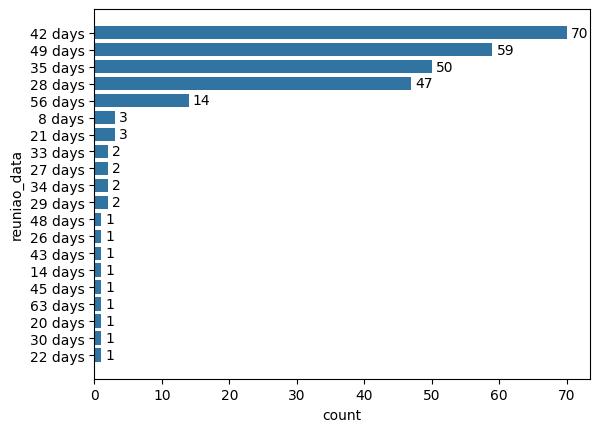

In [28]:
fig, ax = plt.subplots()
sns.barplot(dias_entre_reunioes.value_counts(), orient = 'h', ax = ax)
ax.bar_label(ax.containers[0], fmt=lambda x: int(x), padding = 3)
plt.plot()

A maior ocorrência de dias entre reuniões foram 42 dias, seguido por 49 dias. Mas será que pelo menos em média, as reuniões ocorrem a cada 45 dias?

In [29]:
dias_entre_reunioes.agg(['mean', 'median']).to_frame()

,reuniao_data
mean,39 days 06:12:19.163498099
median,42 days 00:00:00


A média foi 39 dias enquanto a mediana foi de 42 dias. Claramente o fato de ter havido 8 dias entre reuniões fez com que a média diminuísse. Vamos estudar melhorar a distribuição dos dados.

<Axes: ylabel='reuniao_data'>

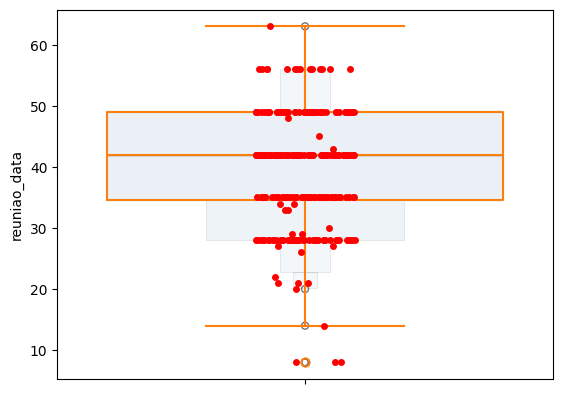

In [30]:
dias_entre_reunioes = (dias_entre_reunioes.astype('str').str.split().str[0]).astype('int')
ax = sns.boxenplot(dias_entre_reunioes, alpha= 0.1)
sns.boxplot(dias_entre_reunioes, fill = False, ax = ax)
sns.stripplot(dias_entre_reunioes, color = 'red', ax = ax)

Aparentemente temos pelo menos 3 outliers, que sem dúvidas 3 correspondem aos 8 dias entre reuniões. Mas para que tenhamos certeza, vamos identificá-los

In [31]:
def boxplot_outlier_filtro(data: pd.Series) -> pd.Series:
    '''Retorna um filtro para isolar outliers 
    
    Parametros:
    ---
    data: pd.Series
        Dados a serem filtrados

    Retorna:
    ---
    pd.Series:
        Série de booleans onde True é outlier e False não
    '''
    data_mean = data.mean()
    data_quartsup = data.quantile(.75)
    data_quartinf = data.quantile(.25)
    data_interquartil = data_quartsup - data_quartinf
    fator = 1.5

    filtro_sup = (data > data_quartinf + (fator * data_interquartil)) 
    filtro_inf = (data < data_quartinf - (fator * data_interquartil)) 

    return filtro_sup | filtro_inf

In [32]:
intrareunioes_outliers = dias_entre_reunioes[boxplot_outlier_filtro(dias_entre_reunioes)].to_frame()
intrareunioes_outliers = intrareunioes_outliers.rename(columns = {intrareunioes_outliers.columns[0]: 'intrareuniao_outlier'})
intrareunioes_outliers

,intrareuniao_outlier
58,63
193,8
250,8
260,8


Na verdade temos 4 outliers. Não posso negar que 8 dias entre reuniões me fez questionar se isso ocorreu devido a reuniões extraordinárias.

In [33]:
intrareuniao_outlier_filtro = boxplot_outlier_filtro(dias_entre_reunioes).reindex(np.arange(0, len(selic_df)), fill_value = False)
selic_df[intrareuniao_outlier_filtro]

,reuniao_num,reuniao_data,reuniao_vies,meta_selic_pctaa,tban_pctam,taxa_selic_pct,taxa_selic_pctaa,vigencia_inicio,vigencia_fim,data_comunicao_decisao_vies
58,211ª,2017-12-06,sem viés,7.0,NaN,1.15,6.90,2017-12-07,2018-02-07,NaT
193,76ª ex. (8),2002-10-14,sem viés,21.0,NaN,0.53,20.90,2002-10-15,2002-10-22,NaT
250,27ª,1998-09-02,n/a,19.0,29.75,0.45,25.49,1998-09-03,1998-09-10,NaT
260,17ª (7),1997-10-22,n/a,1.0,1.00,3.04,45.90,1997-11-01,1997-11-30,NaT


Vamos melhorar mais um pouco avaliando a vizinhança

In [34]:
intrareunioes_outliers_idx = intrareunioes_outliers.index
intrareunioes_outliers_idxvizinhos = []

for i in intrareunioes_outliers_idx:
    if i > 0 and i <= len(selic_df):
        intrareunioes_outliers_idxvizinhos.extend([i - 1, i, i + 1])

selic_df.loc[intrareunioes_outliers_idxvizinhos, :]

,reuniao_num,reuniao_data,reuniao_vies,meta_selic_pctaa,tban_pctam,taxa_selic_pct,taxa_selic_pctaa,vigencia_inicio,vigencia_fim,data_comunicao_decisao_vies
57,212ª,2018-02-07,n/a,6.75,NaN,0.72,6.65,2018-02-08,2018-03-21,NaT
58,211ª,2017-12-06,sem viés,7.00,NaN,1.15,6.90,2017-12-07,2018-02-07,NaT
59,210ª,2017-10-25,sem viés,7.50,NaN,0.80,7.40,2017-10-26,2017-12-06,NaT
192,77ª,2002-10-22,sem viés,21.00,NaN,1.44,20.90,2002-10-23,2002-11-20,NaT
193,76ª ex. (8),2002-10-14,sem viés,21.00,NaN,0.53,20.90,2002-10-15,2002-10-22,NaT
194,75ª,2002-09-18,sem viés,18.00,NaN,1.18,17.90,2002-09-19,2002-10-14,NaT
249,28ª ex. (8),1998-09-10,n/a,19.00,49.75,2.58,40.18,1998-09-11,1998-10-07,NaT
250,27ª,1998-09-02,n/a,19.00,29.75,0.45,25.49,1998-09-03,1998-09-10,NaT
251,26ª,1998-07-29,n/a,19.75,25.75,1.76,19.25,1998-07-30,1998-09-02,NaT
259,18ª ex. (8),1997-10-30,n/a,3.05,3.23,3.18,45.67,1997-10-31,1997-11-30,NaT


Era o que eu havia suspeitado, após dia 22 de outubro de 1997 houve uma reunião extraordinária em 8 dias. O mesmo ocorreu depois do dia 2 de setembro de 2002. Já no dia 14 outubro de 2002 houve uma reunião extraordinária cujo efeito durou apenas os 8 dias até a reunião do dia 22.  
Sobre a diferença 63 dias entre as reuniões do dia 6 de dezembro a 7 de fevereiro, não achei um motivo específico; o que eu encontrei foi que o calendário de reuniões já havia sido divulgado no dia 30 de junho de 2017 (<a href = 'https://economia.uol.com.br/noticias/valor-online/2017/06/30/bc-divulga-calendario-de-reunioes-do-copom-em-2018.htm'>ref<a>). Como a reunião 218º não ocorreu em janeiro, me surgiu a dúvida do quão frequente são as reuniões em janeiro.

In [35]:
selic_df.iat[-1, 1]

Timestamp('1996-06-26 00:00:00')

Como os registros começaram em junho, considerarei somente a partir de 1997

In [36]:
selic_df.loc[selic_df['reuniao_data'].dt.month == 1, ['reuniao_num', 'reuniao_data']]

,reuniao_num,reuniao_data
1,268ª,2025-01-29
9,260ª,2024-01-31
33,236ª,2021-01-20
65,204ª,2017-01-11
73,196ª,2016-01-20
81,188ª,2015-01-21
89,180ª,2014-01-15
97,172ª,2013-01-16
105,164ª,2012-01-18
113,156ª,2011-01-19


Podemos observar da tabela acima que até o ano de 2017, houve reuniões em janeiro. Parece que alguma coisa mudou depois desse ano para que os anos seguintes não tivessem reuniões nesse mês, retornando apenas em 2021 e depois em 2024. Podemos então esperar uma frequência alta.

In [37]:
selic_df.loc[
    selic_df['reuniao_data'].dt.month == 1, 
    'reuniao_data'
].count() / (selic_df.iat[0, 1].year - (selic_df.iat[-2, 1].year + 1))

0.8571428571428571

Uma possível direção para entender a diminuição da frequência de reuniões nos últimos anos e verificar a quantidade de reuniões por ano.

In [38]:
reunioes_ocorrencia = selic_df[['reuniao_data']].set_index('reuniao_data')
reunioes_ocorrencia['ocorrencia'] = 1
reunioes_anuais_ocorrencia = reunioes_ocorrencia.resample('Y').sum()
reunioes_anuais_ocorrencia

,ocorrencia
reuniao_data,
1996-12-31,7
1997-12-31,13
1998-12-31,11
1999-12-31,11
2000-12-31,12
2001-12-31,12
2002-12-31,13
2003-12-31,12
2004-12-31,12


Até o ano de 2015, tínhamos um maior número de reuniões anuais. Depois de 2015, parece que ficou o número de reuniões ficou limitada a 8. Note que o maior número de reuniões não é explicado pela ocorrência de reuniões extraordinárias, pois essas reuniões aconteceram em 2002 e 1997, onde tivemos 13 reuniões anuais, e 1998, com 11 reuniões anuais. Mas tudo isso não necessariamente responde a menor frequência de reuniões em janeiro. Analisaremos, agora, por semestre.

In [39]:
reunioes_ocorrencia.resample('6m').sum()

,ocorrencia
reuniao_data,
1996-06-30,1
1996-12-31,6
1997-06-30,6
1997-12-31,7
1998-06-30,5
1998-12-31,6
1999-06-30,5
1999-12-31,6
2000-06-30,6


A partir de 2015, temos 4 reuniões por semestre, mas ainda não tenho minha resposta. Tentamos por trimestre

In [40]:
reunioes_ocorrencia[reunioes_ocorrencia.index > '2015'].resample('Q').sum()

,ocorrencia
reuniao_data,
2015-03-31,2
2015-06-30,2
2015-09-30,2
2015-12-31,2
2016-03-31,2
2016-06-30,2
2016-09-30,2
2016-12-31,2
2017-03-31,2


Duas reuniões por trimestre. Após uma pesquisa na internet sobre as reuniões, não encontrei nada que indicasse uma mudança formal. Me parece que a aquela reunião não ocorreu em janeiro e não há nada extraordinário nisso. O que eu encontrei foi que antes de 1998, as reuniões  <a href='https://www1.folha.uol.com.br/fsp/1997/12/18/dinheiro/45.html'>eram mensais e passariam a ser realizadas a cada 5 ou 6 semanas </a>. Em 2005, como é perceptível pela tabela acima, ocorre uma nova <a href= 'https://www1.folha.uol.com.br/fsp/dinheiro/fi0111200509.htm'>diminuição de encontros para 8</a>.  
Mudando de assunto, enquanto eu estava pesquisando algumas informações sobre as reuniões, li que, historicamente, a diferença da Meta Selic para a Taxa Selic é de 0,1 ou 0,11 pontos percentuais (<a href='https://t2.com.br/blog/selic-meta-x-selic-over/'>ref<a>). Vamos checar

In [41]:
selic_df['taxaemeta_dif'] = selic_df['meta_selic_pctaa'] - selic_df['taxa_selic_pctaa']
selic_df.head()

,reuniao_num,reuniao_data,reuniao_vies,meta_selic_pctaa,tban_pctam,taxa_selic_pct,taxa_selic_pctaa,vigencia_inicio,vigencia_fim,data_comunicao_decisao_vies,taxaemeta_dif
0,269ª,2025-03-19,n/a,14.25,NaN,NaN,NaN,2025-03-20,2025-04-03,NaT,NaN
1,268ª,2025-01-29,n/a,13.25,NaN,1.63,13.15,2025-01-30,2025-03-19,NaT,0.1
2,267ª,2024-12-11,n/a,12.25,NaN,1.51,12.15,2024-12-12,2025-01-29,NaT,0.1
3,266ª,2024-11-06,n/a,11.25,NaN,0.97,11.15,2024-11-07,2024-12-11,NaT,0.1
4,265ª,2024-09-18,n/a,10.75,NaN,1.42,10.65,2024-09-19,2024-11-06,NaT,0.1


<Axes: xlabel='vigencia_inicio'>

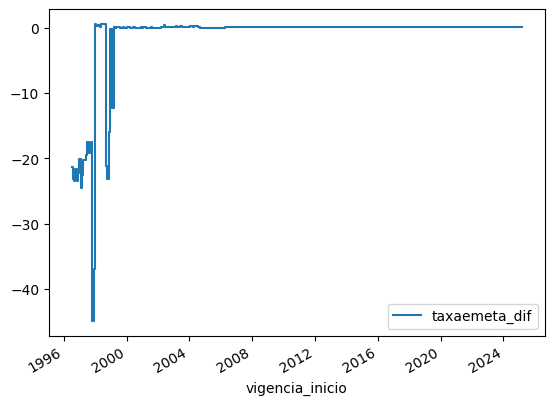

In [42]:
selic_df.plot(x = 'vigencia_inicio', y =  'taxaemeta_dif', drawstyle='steps-post')

Numa análise rápida, me parece que a partir de 1999, tivemos uma estabilização da diferença. E por volta de  2006, o valor tem estado constante. Para melhorar a análise, vamos limitar ao período 1996-1999 e depois 1999-2024.

<Axes: xlabel='vigencia_inicio'>

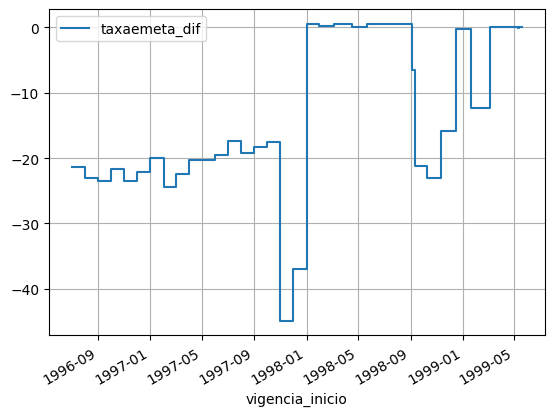

In [43]:
selic_df[selic_df['vigencia_inicio'] < '1999-06']\
    .plot(x = 'vigencia_inicio', y = 'taxaemeta_dif', drawstyle='steps-post', grid=True)

Até 1997, tínhamos a meta menor do que a taxa por volta de 20 pontos percentuais. No final de 1997, há uma queda vertiginosa que leva a diferença a mais de 40 pontos percentuais, que pode ser explicada pelo já comentado <a href='https://en.wikipedia.org/wiki/October_27,_1997,_mini-crash'>crash na bolsa de Hong Kong</a> (<a href = 'https://www1.folha.uol.com.br/fsp/1997/10/31/dinheiro/8.html'>ref</a>). Já em janeiro de 1998, a diferença cai para aproximadamente 0 e se mantém, variando ainda próximo de 0, até setembro de 1998, onde ocorre outra queda brusca fazendo a diferença chegar a 20 pontos percentuais. Depois de uma recuperação no final de dezembro de 1998 há uma queda para aproximadamente 12 pontos percentuais, mas logo a diferença volta a ser 0.  
Agora me pergunto o porquê dessa discrepância entre a meta e a taxa efetiva. Para melhorar o entendimento, vamos plotar os dados da meta e da taxa junto da taxaemeta_dif

<Axes: xlabel='vigencia_inicio'>

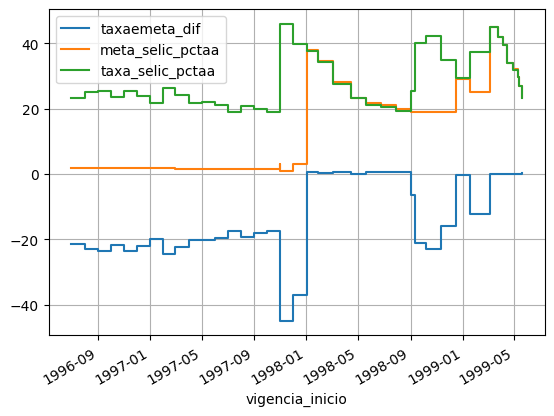

In [44]:
selic_df[selic_df['vigencia_inicio'] < '1999-06'].plot(
    x = 'vigencia_inicio', 
    y =  ['taxaemeta_dif', 'meta_selic_pctaa', 'taxa_selic_pctaa'], 
    drawstyle='steps-post', 
    grid=True
)

Até 1998, a meta não parecia servir de fato como meta, pois sempre havia uma defasagem de pelo menos 20 pontos percentuais. Só vemos a meta acompanhar a taxa a partir de janeiro de 1998 até setembro do mesmo ano, onde a defasagem atinge até um pouco mais de 20 pontos, só voltando a acompanhar a taxa em março de 99. O que será que explica esse desprendimento da meta e da taxa selic por tanto tempo?  
Voltando a página de onde retirei os <a href = 'https://www.bcb.gov.br/controleinflacao/historicotaxasjuros'></a> pude perceber um asterisco que passou desapercebido: 
* No período de 1/7/96 a 4/3/99, o COPOM fixava a TBC e, a partir de 5/3/99, com a extinção desta, passou a divulgar a meta para a Taxa SELIC para fins de política monetária.
* A partir de 2/01/98, as taxas de juros passaram a ser fixadas na expressão anual.   

Ou seja, não havia o conceito de Meta Selic, tal qual conhecemos hoje, antes de junho de 1999, como pode ser visto <a href= 'https://www.bcb.gov.br/pec/appron/Apres/200504PEP-Metas%20de%20Infla%E7%E3o%20e%20Evolu%E7%E3o%20da%20Taxa%20de%20C%E2mbio-Afonso%20Bevilaqua.pdf'>aqui</a>. Acho um grande erro colocar conceitos distintos em uma mesma coluna, mesmo que sinalizado. Para piorar, antes de janeiro de 1998, as taxas na tabela não eram anualizadas, levando a uma confusão.  Pesquisando mais a respeito da TBC, ela foi criada junto com a TBAN em 1996, segundo a <a href='https://www.bcb.gov.br/pec/boletim/Banual96/banualc2.asp?idpai=TARIFA&frame=1'> ata do copom de 1996</a>. Assim foi implementado pelo Copom o sistema de bandas de juros, onde TBAN era o teto e o TBC era o piso (<a href= 'https://www1.folha.uol.com.br/fsp/dinheiro/fi05039906.htm'>ref</a>).  
Vale ressaltar que o Copom foi instituído dia 20 de junho de 1996  com o objetivo de estabelecer as diretrizes da política monetária e de definir a taxa de juros (<a href = 'https://www.bcb.gov.br/htms/copom_normas/a-hist.asp?frame=1'>ref</a>), nos moldes de outros bancos centrais da Europa e dos EUA. A criação da TBC ocorreu dia 29 de maio de 1996 (<a href = 'https://www.bcb.gov.br/pre/normativos/circ/1996/pdf/circ_2698_v1_O.pdf'>ref</a>) enquanto que TBAN foi criada dia 21 de agosto de 1996 (<a href= 'https://normativos.bcb.gov.br/Lists/Normativos/Attachments/45791/Circ_2711_v1_O.pdf'>ref</a>) o que casa com os dados que temos. A Meta Selic, propriamente dita, foi estabelecida na reunião de <a href= 'https://www.bcb.gov.br/pre/normativos/circ/1999/pdf/circ_2868_v2_l.pdf'>4 de março de 1999</a>.  
Como a tabela está bagunçada por opção do BCB, vou mover os dados do tbam mensal para uma nova coluna

In [45]:
selic_df['tbc_pctam'] = selic_df.loc[selic_df['reuniao_data'] < '1999-03-04', 'meta_selic_pctaa']

In [46]:
selic_df.loc[selic_df['reuniao_data'] < '1999-03-04', 'meta_selic_pctaa'] = np.nan

Lembrando que os dados que retiramos da coluna meta_selic_pctaa estão parcialmente anualizados. Para fazer a distinção, alocamos para uma nova coluna tbc_pctaa os dados de a partir de 2 de janeiro de 1998. 

In [47]:
selic_df['tbc_pctaa'] = selic_df.loc[selic_df['vigencia_inicio'] >= '1998-01-02', 'tbc_pctam']
selic_df.loc[selic_df['vigencia_inicio'] >= '1998-01-02', 'tbc_pctam'] = np.nan
selic_df.tail()

,reuniao_num,reuniao_data,reuniao_vies,meta_selic_pctaa,tban_pctam,taxa_selic_pct,taxa_selic_pctaa,vigencia_inicio,vigencia_fim,data_comunicao_decisao_vies,taxaemeta_dif,tbc_pctam,tbc_pctaa
272,5ª,1996-10-23,n/a,NaN,1.90,1.80,25.27,1996-11-01,1996-11-30,NaT,-23.49,1.78,NaN
273,4ª,1996-09-23,n/a,NaN,1.93,1.86,23.48,1996-10-01,1996-10-31,NaT,-21.66,1.82,NaN
274,3ª,1996-08-21,n/a,NaN,NaN,1.90,25.40,1996-09-01,1996-09-30,NaT,-23.52,1.88,NaN
275,2ª,1996-07-30,n/a,NaN,NaN,1.97,25.01,1996-08-01,1996-08-31,NaT,-23.11,1.90,NaN
276,1ª,1996-06-26,n/a,NaN,NaN,1.93,23.28,1996-07-01,1996-07-31,NaT,-21.38,1.90,NaN


A divulgação do TBAN também foi anualizada a partir do mesmo dia

In [48]:
selic_df['tban_pctaa'] = selic_df.loc[selic_df['vigencia_inicio'] >= '1998-01-02', 'tban_pctam'] 
selic_df.loc[selic_df['vigencia_inicio'] >= '1998-01-02', 'tban_pctam'] = np.nan

Falta apenas corrigir a coluna taxaemeta_dif

In [49]:
selic_df.loc[selic_df['reuniao_data'] < '1999-03-04', 'taxaemeta_dif'] = np.nan

Revisitamos o gráfico de taxaedmeta_dif

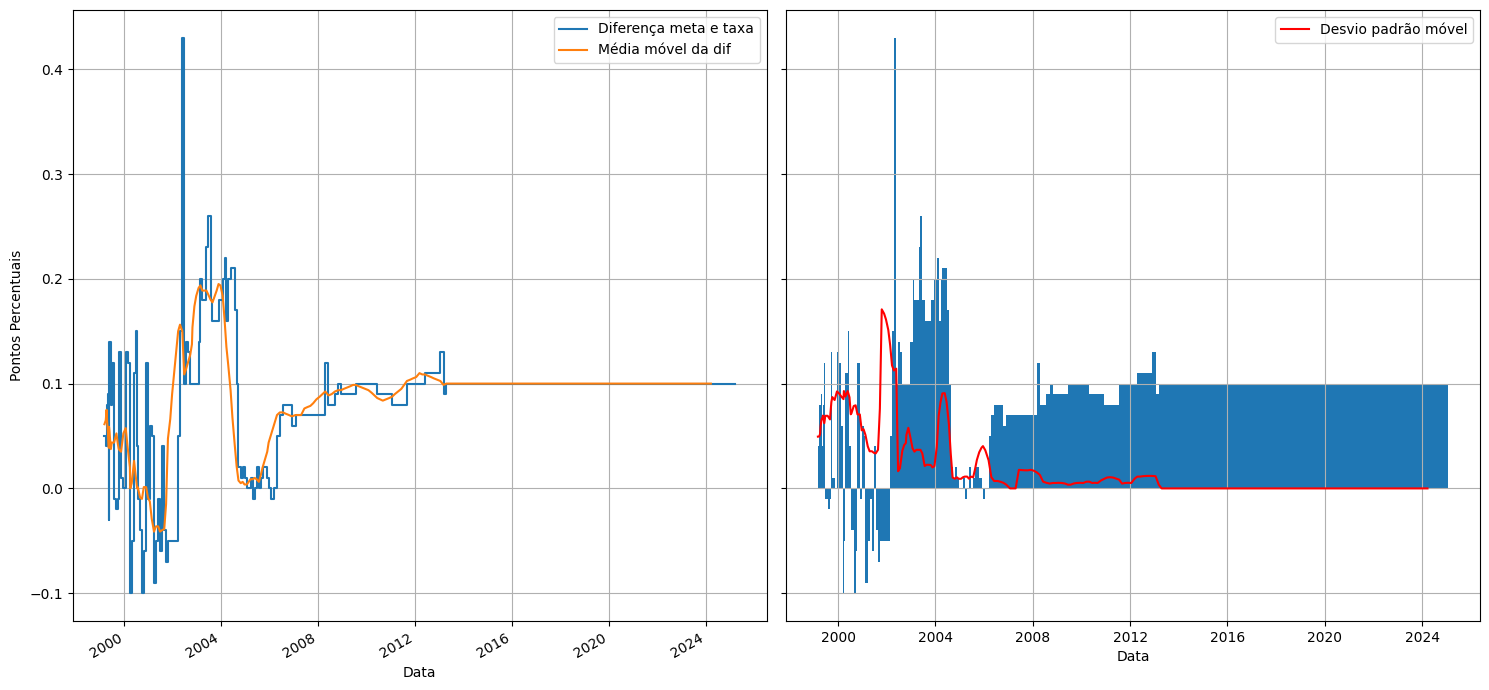

In [50]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7), sharey = True)

selic_df.plot(x = 'vigencia_inicio',  y = 'taxaemeta_dif', drawstyle='steps-post', grid=True, ax = axs[0], label= 'Diferença meta e taxa')
axs[0].plot(selic_df.loc[:,'vigencia_inicio'], selic_df.loc[:,'taxaemeta_dif'].rolling(8).mean(), label= 'Média móvel da dif')
axs[0].set_xlabel('Data')
axs[0].set_ylabel('Pontos Percentuais')
axs[0].legend()

axs[1].fill_between(selic_df['vigencia_inicio'], selic_df['taxaemeta_dif'], step='post')
axs[1].plot(selic_df.loc[:,'vigencia_inicio'], selic_df.loc[:,'taxaemeta_dif'].rolling(8).std(), 'r-', label= 'Desvio padrão móvel')
axs[1].set_xlabel('Data')
axs[1].grid()
axs[1].legend()


fig.tight_layout()
plt.ylabel('Pontos percentuais')
plt.xlabel('Data')
plt.show()

Observamos que até o final de 2001, tivemos uma tendência de queda entre a diferença da meta e da taxa selic, saindo de um pouco abaixo de 0,1 até valores negativos, ou seja, a taxa chegou ficou acima da meta em algumas ocasiões, que segundo o BCB, foi devido a  alta da taxa de câmbio e o ritmo de crescimento da economia, que estava mais acelerado que o previsto (<a href = 'https://feeds.folha.uol.com.br/fsp/dinheiro/fi3103200102.htm'>ref</a>). Logo após, <a href= 'https://www1.folha.uol.com.br/folha/dinheiro/ult91u42790.shtml'>com a queda dos juros</a>, temos um tendência ascendente até atingir um pico (máximo global) que ultrapassa 0,4 pontos percentuais. No gráfico da direita, nesse período, temos um pico mais pronunciado no desvio padrão móvel, pois há uma maior oscilação entre valores negativos e positivos, indicando maior volatilidade. Depois desse pico, como podemos ver no primeiro gráfico, há uma queda brusca para abaixo de 0,15, mas logo a diferença volta a crescer para próximo de 0,2, permanecendo até o final de 2003.  A partir daí, há uma novo tombo, devido ao aumento gradual da taxa de juros (<a href="https://www.bcb.gov.br/pec/boletim/banual2004/rel2004introdp.pdf">ref. pág 11</a>), fazendo a taxa se aproximar da meta e, em algumas datas, até ultrapassar. Depois, temos um aumento em 2006, <a href='https://www1.folha.uol.com.br/fsp/dinheiro/fi2007200604.htm'>devido a queda no juros</a>, e a partir daí começa um período de menor variação até atingir, por volta de 2013, a estabilidade, onde a diferença fica contante, em 0,1 pontos percentuais. 

É muito curioso que antes de 2013 a diferença variava bastante e em um certo dia ela passou a ser constante. Do gráfico acima podemos facilmente encontrar que a partir do mês de abril de 2013, a diferença ficou em 0,1. Não encontrei nada que indicasse uma mudança que justificasse o estabelecimento da meta sempre acima da Selic over em 0,1. No entanto, sabendo que o BCB faz operações no mercado de modo que a Selic over fique alinhada a meta, me leva a pensar que o BCB passou a ser mais rígido em fazer a taxa ser fixa e fixada a 0,1 pontos percentuais abaixo da meta.

Segundo o site da <a href= 'https://t2.com.br/blog/selic-meta-x-selic-over/'>t2</a>, a diferença entre a meta e a selic é sempre 0,1 ou 0,11, daí me vem a dúvida de quantas vezes o valor foi 0,11.

In [51]:
selic_df.loc[np.isclose(selic_df['taxaemeta_dif'], 0.11), ['reuniao_data', 'vigencia_inicio', 'taxaemeta_dif']]

,reuniao_data,vigencia_inicio,taxaemeta_dif
98,2012-11-28,2012-11-29,0.11
99,2012-10-10,2012-10-11,0.11
100,2012-08-29,2012-08-30,0.11
101,2012-07-11,2012-07-12,0.11
102,2012-05-30,2012-05-31,0.11
223,2000-05-24,2000-05-25,0.11


Somente 6 vezes considerando toda a série histórica da meta selic e 5 vezes se considerarmos a partir da década passada como mais recente.

Notando que a diferença entre a meta e a taxa chegou a ser negativa, me pergunto quantas vezes isso ocorreu

In [52]:
print(f'{len(selic_df[selic_df["taxaemeta_dif"] < 0])} de um total de {len(selic_df[selic_df["reuniao_data"] >= "1999-03-04"])} períodos')

24 de um total de 237 períodos


Antes de prosseguir com a análise, me surgiu a curiosidade de se, durante o período de bandas de juros, a taxa selic chegou a ultrapassar esse limites. Vamos plotar

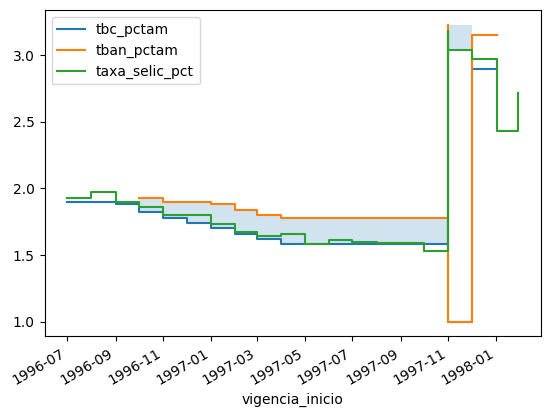

In [53]:
fig, ax = plt.subplots()
selic_df.plot(
    x = 'vigencia_inicio', 
    y =  ['tbc_pctam', 'tban_pctam'], 
    drawstyle='steps-post', 
    grid=True,
    ax = ax
)
selic_df[selic_df['vigencia_inicio'] < '02/01/98'].plot(
    x = 'vigencia_inicio', 
    y = 'taxa_selic_pct', 
    drawstyle='steps-post', 
    ax = ax)
ax.fill_between(selic_df['vigencia_inicio'], selic_df['tbc_pctam'], selic_df['tban_pctam'], alpha= .2, step='pre')

Temos um problema no mês onze de 1997. Isso, na verdade, já foi visto lá atrás e trata-se do problema de datas que tinhamos. 

In [54]:
selic_df[selic_df['reuniao_data'] ==  '1997-10-22'][['reuniao_data', 'tban_pctam', 'tbc_pctam']]

,reuniao_data,tban_pctam,tbc_pctam
260,1997-10-22,1.0,1.0


Estranhamente tban e o tbc estavam com a mesma taxa de juros. Pesquisando mais sobre essa reunião em específico, encontro que as taxas não entraram em vigor (<a href='https://centrodeeconomiapolitica.org/repojs/index.php/journal/article/download/414/404/787'>ref. pág. 443</a>). Vamos excluir essa linha 

In [55]:
selic_df = selic_df.drop(selic_df[selic_df['reuniao_data'] ==  '1997-10-22'].index, axis = 0)

Plotamos novamente o gráfico com as bandas de juros

[]

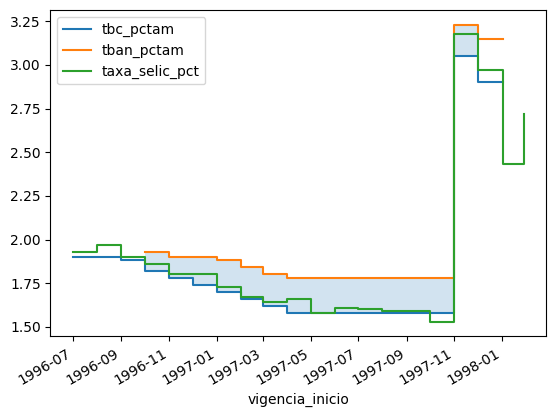

In [56]:
fig, ax = plt.subplots()
selic_df.plot(
    x = 'vigencia_inicio', 
    y =  ['tbc_pctam', 'tban_pctam'], 
    drawstyle='steps-post', 
    grid=True,
    ax = ax
)
selic_df[selic_df['vigencia_inicio'] < '02/01/98'].plot(
    x = 'vigencia_inicio', 
    y = 'taxa_selic_pct', 
    drawstyle='steps-post', 
    ax = ax)
ax.fill_between(selic_df['vigencia_inicio'], selic_df['tbc_pctam'], selic_df['tban_pctam'], alpha= .2, step='pre')
plt.plot()

A partir do gráfico acima, notamos que a taxa selic tendeu a ficar muito mais próxima da Taxa Básica do Banco Central (TBC) do que da Taxa de Assistência do Banco Central (TBAN), com exceção de novembro de 1997, onde houve o aumento da taxa selic devido a crise que se instalou com o crash da bolsa de Hong Kong. Além disso, o valor da taxa selic ficou pelo menos uma vez abaixo da banda inferior. Podemos conferir:

In [57]:
selic_df.query('taxa_selic_pct < tbc_pctam')

,reuniao_num,reuniao_data,reuniao_vies,meta_selic_pctaa,tban_pctam,taxa_selic_pct,taxa_selic_pctaa,vigencia_inicio,vigencia_fim,data_comunicao_decisao_vies,taxaemeta_dif,tbc_pctam,tbc_pctaa,tban_pctaa
261,16ª,1997-09-17,n/a,NaN,1.78,1.53,19.05,1997-10-01,1997-10-30,NaT,NaN,1.58,NaN,NaN


Por fim, vamos ver o período em que a TBAN e a TBC foram anualizadas

[]

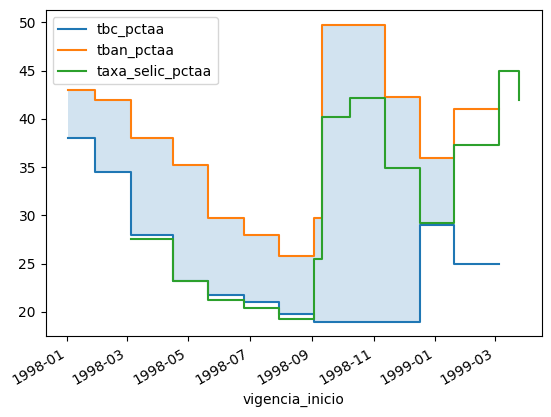

In [58]:
fig, ax = plt.subplots()
selic_df.plot(
    x = 'vigencia_inicio', 
    y =  ['tbc_pctaa', 'tban_pctaa'], 
    drawstyle='steps-post', 
    grid=True,
    ax = ax
)
selic_df.query('vigencia_inicio > "02/01/98" & vigencia_inicio < "4/3/99"').plot(
    x = 'vigencia_inicio', 
    y = 'taxa_selic_pctaa', 
    drawstyle='steps-post', 
    ax = ax)
ax.fill_between(selic_df['vigencia_inicio'], selic_df['tbc_pctaa'], selic_df['tban_pctaa'], alpha= .2, step='pre')
plt.plot()

No período em que as taxas foram anualizadas, notamos que a taxa Selic ficou abaixo do piso de juros, indicando que as bandas não foram efetivas em delimitar os juros. Vamos contar quantas vezes a taxa ficou fora das bandas.

In [59]:
len(selic_df.query('taxa_selic_pctaa < tbc_pctaa | tban_pctaa < taxa_selic_pctaa'))

7

7 vezes em um curto período de tempo.

Vamos salvar os dados transformados em um csv.

In [60]:
selic_df.to_csv('dados/selic_transformacao_preliminar.tsv', sep = '\t')

Voltando ao objeto de minha análise que é a taxa selic, percebemos que os dados estão espaçados não uniformemente, o que é requisito para poder associar com os dados do IPCA. De modo a resolver esse problema, vamos mensalizar os dados. Para isso, primeiro notamos que os dados da selic anual são anualizados considerando dias úteis em um ano, daí vem padrão usado pelo BCB que é um ano tem 252 dias úteis. Logo, uma forma de fazer a transformação é diarizar os dados considerando os mesmos 252 dias, e depois calculamos o acumulado mensal considerando os dias úteis de cada mês. Vamos fazer isso para meta e para a selic (over).

In [61]:
resampledselic_df = selic_df[['vigencia_inicio', 'taxa_selic_pctaa', 'meta_selic_pctaa']]\
    .set_index('vigencia_inicio')\
    .apply(lambda x: np.power(1 + x/100, 1/252))\
    .resample('B')\
    .ffill()

resampledselic_df.tail()

,taxa_selic_pctaa,meta_selic_pctaa
vigencia_inicio,,
2025-03-14,1.00049,1.000494
2025-03-17,1.00049,1.000494
2025-03-18,1.00049,1.000494
2025-03-19,1.00049,1.000494
2025-03-20,NaN,1.000529


Para mensalizarmos, além de excluir sábados e domingos, temos também que excluir feriados. Para isso, vamos usar a biblioteca holidays

In [62]:
import holidays
    
feriados_dict = holidays.Brazil(years = range(selic_df['vigencia_inicio'].dt.year.iloc[-1],selic_df['vigencia_inicio'].dt.year.iloc[0] + 1))

Fazendo uma checagem rápida com as datas presentes <a href='https://www.bcb.gov.br/rex/sml/3-1-feriados.asp?frame=1'>no site do BCB</a>, pude constatar que não havia o feríado de Corpus Christi e nem o dia da Páscoa.

In [63]:
any([date in feriados_dict for date in ['2018-05-31', '2018-04-01']])

False

Outros dias que não constam no link mas não é considerado dia útil para o <a href="https://www.bcb.gov.br/cidadaniafinanceira/direitosdeveres"> BCB</a> são:

* Segunda-feira e terça-feira de Carnaval
* 2 de novembro
* Último dia útil do ano *

*Como há operações entre as próprias instituições financeiras no último dia do ano, então consideramos ele útil. 

In [64]:
'2018-11-02' in feriados_dict

True

In [65]:
'2018-02-13' in feriados_dict

False

Carnaval também não está. Por conta disso, vamos usar os dados do arquivo feriados

In [66]:
feriados_df = pd.read_csv('dados/feriados.csv')

In [67]:
for feriado in feriados_df:
    feriados_df[feriado] = pd.to_datetime(feriados_df[feriado])

In [68]:
feriados_df = feriados_df.unstack().to_frame().set_index(0)

Mensalizamos a taxa selic diária com o filtro criado usando o dicionário de feriados.

In [69]:
selicmensal_df = resampledselic_df[~resampledselic_df.index.isin(feriados_df.index)]\
    .resample('M')\
    .prod()\
    .apply(lambda x: (x - 1) * 100)
selicmensal_df = selicmensal_df.iloc[:-1, :]
selicmensal_df.head()

,taxa_selic_pctaa,meta_selic_pctaa
vigencia_inicio,,
1996-07-31,1.928529,0.0
1996-08-31,1.967890,0.0
1996-09-30,1.904054,0.0
1996-10-31,1.943610,0.0
1996-11-30,1.895246,0.0


Desconsiderei o último valor pois o mês pode não ter fechado ainda.

Como o indice não representa uma data específica e sim um periodo, vamos mudar a coluna para periodo e renomeá-la.

In [70]:
selicmensal_df.index = selicmensal_df.index.to_period()
selicmensal_df = selicmensal_df.reset_index()
selicmensal_df = selicmensal_df.rename(columns = {
    'vigencia_inicio': 'periodo_mes',
    'meta_selic_pctaa': 'meta_acumulada_nomes', 
    'taxa_selic_pctaa': 'selic_acumulada_nomes'
})
selicmensal_df.head()

,periodo_mes,selic_acumulada_nomes,meta_acumulada_nomes
0,1996-07,1.928529,0.0
1,1996-08,1.967890,0.0
2,1996-09,1.904054,0.0
3,1996-10,1.943610,0.0
4,1996-11,1.895246,0.0


Da tabela acima, a coluna meta_acumulada_mes apresenta como taxa o número 0 em datas onde ela não existia. Isso se deve às transformações feitas na obtenção dos valores mensais. Para lidar com isso, vamos mudar esse valor para NaN.

In [71]:
selicmensal_df['meta_acumulada_nomes'] = selicmensal_df['meta_acumulada_nomes'].replace(0, np.nan)

Fazemos também uma tabela anual (para representar o acumulado no ano)

In [72]:
selicnoano_df = resampledselic_df[~resampledselic_df.index.isin(feriados_df.index)]\
    .resample('Y')\
    .prod()\
    .apply(lambda x: (x - 1) * 100)
selicnoano_df = selicnoano_df.reset_index()
selicnoano_df = selicnoano_df.rename(columns = {
    'vigencia_inicio': 'ano',
    'taxa_selic_pctaa': 'selic_acumulada_noano',
    'meta_selic_pctaa': 'meta_selic_noano'
})
selicnoano_df['ano'] = selicnoano_df['ano'].dt.year
selicnoano_df = selicnoano_df.iloc[:-1, :]
selicnoano_df['meta_selic_noano'] = selicnoano_df['meta_selic_noano'].replace(0, np.nan)
selicnoano_df.head()

,ano,selic_acumulada_noano,meta_selic_noano
0,1996,12.099091,NaN
1,1997,25.463435,NaN
2,1998,30.041154,NaN
3,1999,26.552702,20.276692
4,2000,17.947014,17.965603


<hr>

<h3><span id='IPCA'></span>2. IPCA</h3>

Vamos agora obter os dados referente ao IPCA. Eles são divulgados pelo IBGE e podem ser encontrados facilmente <a href= 'https://ftp.ibge.gov.br/Precos_Indices_de_Precos_ao_Consumidor/IPCA/Serie_Historica/ipca_SerieHist.zip'>nesse link</a>

In [73]:
import requests
from io import BytesIO
from zipfile import ZipFile

In [74]:
ipca_url = "https://ftp.ibge.gov.br/Precos_Indices_de_Precos_ao_Consumidor/IPCA/Serie_Historica/ipca_SerieHist.zip"
file = requests.get(ipca_url).content
file_bytes = BytesIO(file)

unzipped = ZipFile(file_bytes)
ipca_file = unzipped.namelist()[0]

In [75]:
ipca_df = pd.read_excel(BytesIO(unzipped.read(ipca_file)))
ipca_df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,SÉRIE HISTÓRICA DO IPCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(continua)
2,NaN,NaN,NaN,NaN,NaN,VARIAÇÃO,NaN,NaN
3,ANO,MÊS,NÚMERO ÍNDICE,(%),NaN,NaN,NaN,NaN
4,NaN,NaN,(DEZ 93 = 100),NO,3,6,NO,12
5,NaN,NaN,NaN,MÊS,MESES,MESES,ANO,MESES
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1994,JAN,141.31,41.31,162.13,533.33,41.31,2693.84
8,NaN,FEV,198.22,40.27,171.24,568.17,98.22,3035.71
9,NaN,MAR,282.96,42.75,182.96,602.93,182.96,3417.39


Devido a como os dados estão dispostos na planilha de excel com uma formatação não muito amigável, as linhas da tabela estão desorganizadas e cheias de NaNs. Entretanto, é possível notar que cada linha que contém os dados de interessa, tem no máximo um NaN. Dessa forma podemos usar essa lógica como filtro.

In [76]:
ipca_df = ipca_df[ipca_df.isnull().sum(axis = 'columns') <= 1].reset_index(drop=True)
ipca_df_cols = [
    'ano',
    'mes',
    'ipca_numero_indice',
    'ipca_var_mensal',
    'ipca_var_trimestral',
    'ipca_var_semetral',
    'ipca_no_ano',
    'ipca_acumulado_ano'
]
ipca_df.columns = ipca_df_cols
ipca_df.head()

,ano,mes,ipca_numero_indice,ipca_var_mensal,ipca_var_trimestral,ipca_var_semetral,ipca_no_ano,ipca_acumulado_ano
0,1994,JAN,141.31,41.31,162.13,533.33,41.31,2693.84
1,NaN,FEV,198.22,40.27,171.24,568.17,98.22,3035.71
2,NaN,MAR,282.96,42.75,182.96,602.93,182.96,3417.39
3,NaN,ABR,403.73,42.68,185.71,648.92,303.73,3828.49
4,NaN,MAI,581.49,44.03,193.36,695.71,481.49,4331.19


Dá para perceber que temos alguns dados na coluna ano, vamos ver se há mais em outras colunas.

In [77]:
ipca_df.isnull().sum()[ipca_df.isnull().sum() > 0]

ano    342
dtype: int64

Somente ano. Preenchemos os anos faltantes notando que somente temos a coluna ano em janeiro.

In [78]:
ipca_df['ano'] = ipca_df['ano'].ffill().astype('str')
ipca_df.head()

,ano,mes,ipca_numero_indice,ipca_var_mensal,ipca_var_trimestral,ipca_var_semetral,ipca_no_ano,ipca_acumulado_ano
0,1994,JAN,141.31,41.31,162.13,533.33,41.31,2693.84
1,1994,FEV,198.22,40.27,171.24,568.17,98.22,3035.71
2,1994,MAR,282.96,42.75,182.96,602.93,182.96,3417.39
3,1994,ABR,403.73,42.68,185.71,648.92,303.73,3828.49
4,1994,MAI,581.49,44.03,193.36,695.71,481.49,4331.19


<h4><span id='SobreIPCA'></span>Sobre o dataset: IPCA</h4>

<table>
    <thead>
        <tr>
            <th>Variável</th>
            <th>Descrição</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>ano</th>
            <td>Ano numérico</td>
        </tr>
        <tr>
            <th>mes</th>
            <td>Nome do mês limitado a três letras</td>
        </tr>
        <tr>
            <th>ipca_numero_indice</th>
            <td>Média aritmética ponderada dos 16 índices metropolitanos mensais, que são calculados pela fórmula de Laspeyres.  </td>
        </tr>
        <tr>
            <th>ipca_var_mensal</th>
            <td>Variação mensal do índice durante o mês. </td>
        </tr>
        <tr>
            <th>ipca_var_trimestral</th>
            <td>Variação trimestral do índice considerando os últimos 3 meses. </td>
        </tr>
        <tr>
            <th>ipca_var_semetral</th>
            <td> Variação semestral do índice considerando os últimos 6 meses. </td>
        </tr>
        <tr>
            <th>ipca_no_ano</th>
            <td> Variação do índice no mês referência em relação ao índice de dezembro do ano passado ao ano de referência. </td>
        </tr>
        <tr>
            <th>ipca_acumulado_ano</th>
            <td>Soma da variação mensal de 12 meses. </td>
        </tr>
    </tbody>
</table>

Note que é a variação do ipca_numero_indice que corresponde a taxa de inflação. 

Visualizamos os tipos

In [79]:
ipca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ano                  374 non-null    object
 1   mes                  374 non-null    object
 2   ipca_numero_indice   374 non-null    object
 3   ipca_var_mensal      374 non-null    object
 4   ipca_var_trimestral  374 non-null    object
 5   ipca_var_semetral    374 non-null    object
 6   ipca_no_ano          374 non-null    object
 7   ipca_acumulado_ano   374 non-null    object
dtypes: object(8)
memory usage: 23.5+ KB


Vamos ver quais são os tipos que compõem cada coluna.

In [80]:
dfcols_type(ipca_df)

{'ano': {str},
 'mes': {str},
 'ipca_numero_indice': {float, int},
 'ipca_var_mensal': {float, int},
 'ipca_var_trimestral': {float, int},
 'ipca_var_semetral': {float, int},
 'ipca_no_ano': {float, int},
 'ipca_acumulado_ano': {float, int}}

Temos uma mistura de float e int nas coluna que são obejct. Antes de uniformizar isso, vamos criar uma coluna com os meses em formato numerico só que em string, para depois criarmos uma coluna periodo, haja vista que não faz sentido usarmos data nesse caso.

In [81]:
meses_numcap = {
    'JAN': '1',
    'FEV': '2',
    'MAR': '3',
    'ABR': '4',
    'MAI': '5',
    'JUN': '6',
    'JUL': '7',
    'AGO': '8',
    'SET': '9',
    'OUT': '10',
    'NOV': '11',
    'DEZ': '12'
}

In [82]:
ipca_df['mes_num'] = ipca_df['mes'].map(meses_numcap)
ipca_df['periodo_mes'] = ipca_df['ano'] + '-' + ipca_df['mes_num']

ipca_df['periodo_mes'] = pd.PeriodIndex(ipca_df['periodo_mes'], freq='M')
ipca_df.head()

,ano,mes,ipca_numero_indice,ipca_var_mensal,ipca_var_trimestral,ipca_var_semetral,ipca_no_ano,ipca_acumulado_ano,mes_num,periodo_mes
0,1994,JAN,141.31,41.31,162.13,533.33,41.31,2693.84,1,1994-01
1,1994,FEV,198.22,40.27,171.24,568.17,98.22,3035.71,2,1994-02
2,1994,MAR,282.96,42.75,182.96,602.93,182.96,3417.39,3,1994-03
3,1994,ABR,403.73,42.68,185.71,648.92,303.73,3828.49,4,1994-04
4,1994,MAI,581.49,44.03,193.36,695.71,481.49,4331.19,5,1994-05


Transformamos os dados para seus respectivos tipos numéricos

In [83]:
for ii in range(len(ipca_df.columns) - 1):
    if ii == 1:
        continue
    ipca_df[ipca_df.columns[ii]] = pd.to_numeric(ipca_df[ipca_df.columns[ii]])
ipca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype    
---  ------               --------------  -----    
 0   ano                  374 non-null    int64    
 1   mes                  374 non-null    object   
 2   ipca_numero_indice   374 non-null    float64  
 3   ipca_var_mensal      374 non-null    float64  
 4   ipca_var_trimestral  374 non-null    float64  
 5   ipca_var_semetral    374 non-null    float64  
 6   ipca_no_ano          374 non-null    float64  
 7   ipca_acumulado_ano   374 non-null    float64  
 8   mes_num              374 non-null    int64    
 9   periodo_mes          374 non-null    period[M]
dtypes: float64(6), int64(2), object(1), period[M](1)
memory usage: 29.3+ KB


Vamos limitar para as variáveis de interesse.

In [84]:
ipca_df = ipca_df[['mes', 'periodo_mes', 'ano', 'ipca_no_ano', 'ipca_var_mensal']]
ipca_df.head()

,mes,periodo_mes,ano,ipca_no_ano,ipca_var_mensal
0,JAN,1994-01,1994,41.31,41.31
1,FEV,1994-02,1994,98.22,40.27
2,MAR,1994-03,1994,182.96,42.75
3,ABR,1994-04,1994,303.73,42.68
4,MAI,1994-05,1994,481.49,44.03


Vou ainda acrescentar uma coluna com a década de cada dado para melhorar o poder de explicação.

In [85]:
ipca_df['decada'] = (np.floor(ipca_df['ano'] / 10) * 10).astype('int')
ipca_df.head()

,mes,periodo_mes,ano,ipca_no_ano,ipca_var_mensal,decada
0,JAN,1994-01,1994,41.31,41.31,1990
1,FEV,1994-02,1994,98.22,40.27,1990
2,MAR,1994-03,1994,182.96,42.75,1990
3,ABR,1994-04,1994,303.73,42.68,1990
4,MAI,1994-05,1994,481.49,44.03,1990


Criamos também a versão anualizada

In [86]:
ipca_noano_df = ipca_df.groupby('ano')[['ipca_no_ano', 'decada']].last().reset_index()

<hr></hr>
Combinamos os dados da selic e do ipca

In [87]:
merged_mensal_df = selicmensal_df.merge(ipca_df, how='inner', on='periodo_mes')
merged_mensal_df.head()

,periodo_mes,selic_acumulada_nomes,meta_acumulada_nomes,mes,ano,ipca_no_ano,ipca_var_mensal,decada
0,1996-07,1.928529,NaN,JUL,1996,7.74,1.11,1990
1,1996-08,1.967890,NaN,AGO,1996,8.22,0.44,1990
2,1996-09,1.904054,NaN,SET,1996,8.38,0.15,1990
3,1996-10,1.943610,NaN,OUT,1996,8.70,0.30,1990
4,1996-11,1.895246,NaN,NOV,1996,9.05,0.32,1990


Devido a algumas bibliotecas terem problema de interpretar o tipo period, criamos uma nova coluna com o tipo datetime.

In [88]:
merged_mensal_df['periodo_timeformat'] = merged_mensal_df['periodo_mes'].dt.to_timestamp()

Salvamos os dados em csv.

In [89]:
merged_mensal_df.to_csv('dados/selic_ipca_mensal.tsv', sep = '\t', index =  False)

Fazemos o mesmo para anual.

In [90]:
merged_noano_df = selicnoano_df.merge(
    ipca_noano_df, how='inner', on='ano', 
)
merged_noano_df.to_csv('dados/selic_ipca_noano.tsv', sep = '\t', index = False)